|k-近傍回帰|
|:-|

k-近傍回帰には，回帰を行う変種がある．ここでも１最近傍点を用いるものから見ていく．今回はwaveデータセットを用いる．３つのテストデータポイントを緑色の星印としてx軸上に書いた．１最近傍点を用いる予測では，最近傍点の値をそのまま使う．下図の青い星印が予測点である．

**k-最近傍法**  
- 分類問題に使用される
- 与えられた入力データポイントのクラスラベル（カテゴリ）を予測する．
- 例：画像を見て犬か猫かを分類する．
**k-近傍回帰**  
- 回帰問題に使用される．
- 与えられてた入力データポイントの連続値（数値）を予測する．
- 例：家の特徴（面積，部屋数など）を基に家の価格を予測する．  

**出力の違い**  
- **k-最近傍法**
  - 出力は離散的なクラスラベル．例えば「クラス１」「クラス２」など．
  - k個の最近傍のデータポイントの多数決（投票）に基づいて，対象のデータポイントのクラスラベルを決定する．
- **k-近傍回帰**
  - 出力は連続的な数値．例えば，0から100までの範囲の数値や実際の価格など．
  - k個の最近傍のデータポイントの目標値の平均または重み付き平均に基づいて，対象のデータポイントの数値を予測する．

ここでいう「回帰」とは，**連続値の出力を予測する問題**を指す．与えられた入力データ（特徴）に基づいて数値的な出力を予測することを目的としている．

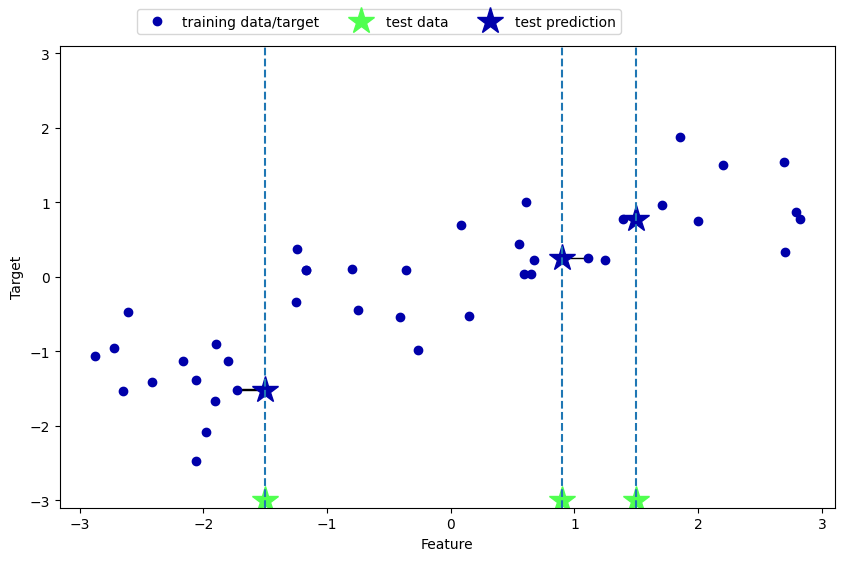

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

mglearn.plots.plot_knn_regression(n_neighbors=1)

クラス分類の場合と同様に，より多くの最近傍点を用いることもできる．複数の最近傍点を用いる場合には，最近傍点の平均値を用いる．

In [2]:
# mglearn.plots.plot_knn_regression(n_neighbors=3)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる．
reg.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test))) # テストセットに対する精度

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


scoreメソッドを用いてモデルを評価することもできる．このメソッドに対して回帰予測器は，$R^2$スコアを返す．$R^2$スコアは決定係数と呼ばれ，回帰モデルの予測の正確さを測る指標で，0から1までの値を取る．1は完全な予測に対応し，0は訓練セットのレスポンス値の平均を返すだけのものに対応する．

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


これは比較的良いモデルであることを意味する．

**一次元のデータセットに対して，すべての値に対する予測値がどのようになるかを見てみる．これには，たくさんのデータポイントを持つデータセットをつくればよい．**

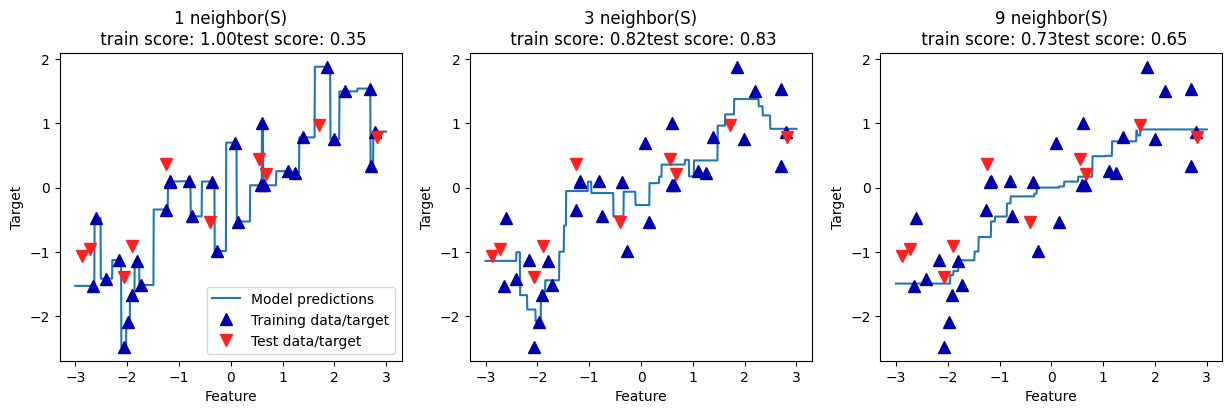

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る．
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(S)\n train score: {:.2f}test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc ="best")
        

このグラフからわかるように，１最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えており，予測はすべて訓練データのポイントを通っている．このため予測は非常に不安定になっている．考慮する最近傍点を増やしていくと，予測はスムーズになるが，訓練データに対する適合度は下がる．